## Use SpaceMix on data
1. Convert geno file to required format, using popns I want to include: Make allelecount file (.allelecount) and samplesize file (.samplesize), as well as latlong file (.latlong)

In [1]:
%%writefile /mnt/solexa/mel_yang/neolithic/SpaceMix/makedatafiles.py

##Make allele count and samplesize files -- these will need to be transposed in R for correct format
import HOdata
import collections
import random
import sys

pD=sys.argv[1]      ##data directory: /mnt/solexa/mel_yang/bronzeage/data/
outpd=sys.argv[2]   ##output directory: /mnt/solexa/mel_yang/neolithic/SpaceMix/
fh=sys.argv[3]      ##fh name of geno file
subset=sys.argv[4]  ##name to add -- will add all or rd to end
prunedfh=sys.argv[5]## fh of pruned indices list
myeas=sys.argv[6]   ## comma separated list of individual names to include
randall=sys.argv[7] ## all or rd

subset=subset+"_"+randall
myeas=myeas.split(',')

indices=collections.defaultdict(list)
indfh=open(pD+fh+".ind",'r')
for ind,line in enumerate(indfh):
    x=line.split()
    if x[2] not in myeas: continue
    indices[x[2]].append(ind)
indfh.close()

newallelefile=open(outpd+fh+"."+subset+".allelecount",'w')
newssfile=open(outpd+fh+"."+subset+".samplesize",'w')
#newallelefile.write("\t".join(myeas)+'\n')
#newssfile.write("\t".join(myeas)+'\n')

prunedsnpfile=open(pD+prunedfh+".snpind",'r')
postokeep=[int(line.strip()) for line in prunedsnpfile]
prunedsnpfile.close()


genofh=open(pD+fh+".geno",'r')
for ind,line in enumerate(genofh):
    if ind not in postokeep: continue
    genos,counts=[],[]
    for mypop in myeas:
        ##Number of the reference allele
        mygenos=sum([int(line[pos]) for pos in indices[mypop] if line[pos]!='9'])
        mycounts=sum([2 for pos in indices[mypop] if line[pos]!='9'])
        
        if randall=="rd":
            if mycounts==2: counts.append('2'); genos.append(str(mygenos)); continue ##ONLY ONE INDIV
            if mycounts==0: counts.append('0'); genos.append('0'); continue ##MISSING DATA

            fullset=['a']*mygenos+['b']*(mycounts-mygenos)
            sampledalleles=''.join(random.sample(fullset,2))
            if sampledalleles == 'aa': genos.append('2')
            elif sampledalleles == 'bb': genos.append('0')
            elif sampledalleles in ['ab','ba']: genos.append('1')
            else: print 'whaaa?', sampledalleles
            counts.append('2')
        
        if randall=="all":
            if mycounts==0: counts.append('0'); genos.append('0'); continue ##MISSING DATA
            genos.append(str(mygenos))
            counts.append(str(mycounts))
    
    newallelefile.write('\t'.join(genos)+'\n')
    newssfile.write('\t'.join(counts)+'\n')
    #if ind==100: break

newallelefile.close()
newssfile.close()


Overwriting /mnt/solexa/mel_yang/neolithic/SpaceMix/makedatafiles.py


In [11]:
import HOdata

myeas=HOdata.eas+["LiangDao","Linzi","Boisman_MN","Zongri"]
myeas.remove("Kyrgyz")
myeas.remove("Kyrgyz_China")
myeas.remove("Kazakh")
myeas.remove("Kazakh_China")
myeas.remove("Uygur")
myeas.remove("Salar")
myeas.remove("Malay")
myeas.remove("Malayan")

weas=['Tibetan_Shannan','Tibetan_Chamdo','Tibetan_Gangcha','Zongri']
neas=['Boisman_MN','Linzi','Oroqen','Daur','Hezhen','Mongola','Ulchi','Xibo']
seas=['LiangDao','Japanese','Korean','Han_NChina','Han_Shandong','Han_Jiangsu','Han_Sichuan',
      'Dai','Li','Maonan','Miao','She',
      'Zhuang','Ami_Stoneking','Atayal_Stoneking','Kinh_Vietnam_KHV','Yi']
#myeas=weas+neas+seas

myeasstr=",".join(myeas)
pD="/mnt/solexa/mel_yang/bronzeage/data/"
outpd="/mnt/solexa/mel_yang/neolithic/SpaceMix/"
fh="ind_A_v13_TBH5"
prunedfh="ind_A_v13_TBH5.ALLHOANC_pruned_50_5_0.2"

subset="pruned_50_5_0.2_EAS+ANC"
#subset="pruned_50_5_0.2_subEA+ANC"

for randall in ["rd","all"]:
    print "python makedatafiles.py %s %s %s %s %s %s %s &" % (pD,outpd,fh,subset,prunedfh,myeasstr,randall)
    print
    print "python makedatafiles_latlong.py %s %s %s %s %s" % (pD,outpd,fh,subset+"_"+randall,myeasstr)
    print

python makedatafiles.py /mnt/solexa/mel_yang/bronzeage/data/ /mnt/solexa/mel_yang/neolithic/SpaceMix/ ind_A_v13_TBH5 pruned_50_5_0.2_EAS+ANC ind_A_v13_TBH5.ALLHOANC_pruned_50_5_0.2 Daur,Hezhen,Mongola,Naxi,Oroqen,Ulchi,Xibo,Dai,Dong,Gelao,Lahu,Li,Maonan,Miao,Mulam,She,Tujia,Yi,Zhuang,Cambodian,Han_Chongqing,Han_Fujian,Han_Guandong,Han_Henan,Han_HGDP,Han_Hubei,Han_Jiangsu,Han_NChina,Han_Shandong,Han_Shanghai,Han_Shanxi,Han_Sichuan,Han_Zhejiang,Kinh_Vietnam_KHV,Korean,Thai,Qiang_Horpa,Tibetan_Chamdo,Tibetan_Gangcha,Tibetan_Gannan,Tibetan_Lhasa,Tibetan_Nagqu,Tibetan_Shannan,Tibetan_Shigatse,Tibetan_Xinlong,Tibetan_Xunhua,Tibetan_Yajiang,Japanese,Ami_Stoneking,Atayal_Stoneking,Tu,Dongxiang,Mongol,Tibetan_Yunnan,Bunun,Tao,Burmese,Vietnamese,Paiwan,Rukai,Hakka,Minnan,Pingpu,Atayal_Coriell,Ami_Coriell,Bonan,Yugur_Eastern,Yugur_Western,LiangDao,Linzi,Boisman_MN,Zongri rd &

python makedatafiles_latlong.py /mnt/solexa/mel_yang/bronzeage/data/ /mnt/solexa/mel_yang/neolithic/SpaceMix/ ind_A_v13_T

In [128]:
%%writefile /mnt/solexa/mel_yang/neolithic/SpaceMix/makedatafiles_all.py

##Make allele count and samplesize files -- these will need to be transposed in R for correct format
import HOdata
import collections
import random

myeas=HOdata.eas+["LiangDao","Linzi","Boisman_MN","Zongri"]
myeas.remove("Kyrgyz")
myeas.remove("Kyrgyz_China")
myeas.remove("Kazakh")
myeas.remove("Kazakh_China")
myeas.remove("Uygur")
myeas.remove("Salar")
myeas.remove("Malay")
myeas.remove("Malayan")

weas=['Tibetan_Shannan','Tibetan_Chamdo','Tibetan_Gangcha','Zongri']
neas=['Boisman_MN','Linzi','Oroqen','Daur','Hezhen','Mongola','Ulchi','Xibo']
seas=['LiangDao','Japanese','Korean','Han_NChina','Han_Shandong','Han_Jiangsu','Han_Sichuan',
      'Dai','Li','Maonan','Miao','She',
      'Zhuang','Ami_Stoneking','Atayal_Stoneking','Kinh_Vietnam_KHV','Yi']
myeas=weas+neas+seas

pD="/mnt/solexa/mel_yang/bronzeage/data/"
outpd="/mnt/solexa/mel_yang/neolithic/SpaceMix/"
#fh="ind_A_v13_TBH5"
fh="ind_A_v13_TBH5.ALLHOANC_pruned_50_5_0.2"
subset="EAS+ANC_all"
subset="subEA+ANC_all"

indices=collections.defaultdict(list)
indfh=open(pD+fh+".ind",'r')
for ind,line in enumerate(indfh):
    x=line.split()
    if x[2] not in myeas: continue
    indices[x[2]].append(ind)
indfh.close()

newallelefile=open(outpd+fh+"."+subset+".allelecount",'w')
newssfile=open(outpd+fh+"."+subset+".samplesize",'w')
#newallelefile.write("\t".join(myeas)+'\n')
#newssfile.write("\t".join(myeas)+'\n')

prunedsnpfile=open(pD+fh+".snpind",'r')
postokeep=[int(line.strip()) for line in prunedsnpfile]
prunedsnpfile.close()

genofh=open(pD+fh+".geno",'r')
for ind,line in enumerate(genofh):
    if ind not in postokeep: continue
    genos,counts=[],[]
    for mypop in myeas:
        
        ##Number of the reference allele
        mygenos=sum([int(line[pos]) for pos in indices[mypop] if line[pos]!='9'])
        mycounts=sum([2 for pos in indices[mypop] if line[pos]!='9'])
        #if mycounts==2: counts.append('2'); genos.append(str(mygenos)); continue ##ONLY ONE INDIV
        if mycounts==0: counts.append('0'); genos.append('0'); continue ##MISSING DATA
        genos.append(str(mygenos))
        counts.append(str(mycounts))
        #fullset=['a']*mygenos+['b']*(mycounts-mygenos)
        #sampledalleles=''.join(random.sample(fullset,2))
        #if sampledalleles == 'aa': genos.append('2')
        #elif sampledalleles == 'bb': genos.append('0')
        #elif sampledalleles in ['ab','ba']: genos.append('1')
        #else: print 'whaaa?', sampledalleles
        #counts.append('2')
    
    newallelefile.write('\t'.join(genos)+'\n')
    newssfile.write('\t'.join(counts)+'\n')
    #if ind==100: break

newallelefile.close()
newssfile.close()


Overwriting /mnt/solexa/mel_yang/neolithic/SpaceMix/makedatafiles_all.py


In [9]:
%%writefile /mnt/solexa/mel_yang/neolithic/SpaceMix/makedatafiles_latlong.py

##Make latlong file
import HOdata
import collections
import random
import sys 

pD=sys.argv[1]      ##data directory: /mnt/solexa/mel_yang/bronzeage/data/
outpd=sys.argv[2]   ##output directory: /mnt/solexa/mel_yang/neolithic/SpaceMix/
fh=sys.argv[3]      ##fh name of geno file
subset=sys.argv[4]  ##name to add -- will add all or rd to end
myeasstr=sys.argv[5]   ## comma separated list of individual names to include

myeas=myeasstr.split(',')

newGPSfile=open(outpd+fh+"."+subset+".latlong",'w')
mylat=[0 for i in myeas]
mylong=[0 for i in myeas]

locationfile=open(pD+'v13.3_HO.anno','r')
for ind,entry in enumerate(locationfile):
    if entry[0]=="#": continue
    x=entry.split('\t')

    if x[2] in myeas: 
        if x[2] == "Thai": 
            mylat[myeas.index(x[2])]=13.8
            mylong[myeas.index(x[2])]=100.5
            continue
        #if x[2] in HOdata.anceas+HOdata.anceas2: continue
        #print x[2:3]+x[8:11]
        if x[8] in ['-','NA']: mylat[myeas.index(x[2])]=-5
        else: mylat[myeas.index(x[2])]=float(x[8])
        if x[9] in ['-','NA']: mylong[myeas.index(x[2])]=-5
        else: mylong[myeas.index(x[2])]=float(x[9])
            
mylat[myeas.index("Boisman_MN")]=43.8  ##looking up Primorye east coast
mylong[myeas.index("Boisman_MN")]=135  ##looking up Primorye east coast

for ind,mypop in enumerate(myeas):
    newGPSfile.write("%s\t%.3f\t%.3f\n" % (mypop,mylat[ind],mylong[ind]))
newGPSfile.close()

Overwriting /mnt/solexa/mel_yang/neolithic/SpaceMix/makedatafiles_latlong.py


In [115]:
%%writefile /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemixgen.R
args=commandArgs(TRUE)
MYPD = as.character(args[1])      ##project directory
FH = as.character(args[2])        ##fh of data
SUBSET = as.character(args[3])    ##subset after fh
GPSCAT = as.character(args[4])       ##Do with GPS? wGPS vs noGPS
SOURCE = as.character(args[5])    ##Do with admixture? "no_movement","source","target","source_and_target"
#

require(SpaceMix)
Stable=read.table(paste(MYPD,FH,".",SUBSET,".allelecount",sep=""),header=FALSE)
S=t(as.matrix(Stable))
Ctable=read.table(paste(MYPD,FH,".",SUBSET,".samplesize",sep=""),header=FALSE)
C=t(as.matrix(Ctable))
GPS=read.table(paste(MYPD,FH,".",SUBSET,".latlong",sep=""),header=FALSE)
lat=GPS$V2
lon=GPS$V3


##https://github.com/gbradburd/SpaceMix/blob/master/vignettes/spacemix_vignette.Rmd
# Next, make allele frequencies and mean sample size objects
allele.frequencies <- S / C
tmp.sample.sizes <- C
tmp.sample.sizes[which(C == 0)] <- NA
mean.sample.sizes <- rowMeans(tmp.sample.sizes,na.rm=TRUE)

if (GPSCAT=="wGPS") {
    xcoord=lon
    ycoord=lat
}
if (GPSCAT=="noGPS") {
    xcoord=runif(length(mean.sample.sizes),-180,180)
    ycoord=runif(length(mean.sample.sizes),-90,90)
}

print ("Running SpaceMix!")

# Data option: allele frequencies and mean sample sizes
# Fast Model option: estimating geogenetic locations and 
#					 admixture source locations
# Long Model option: estimating geogenetic locations and 
#					 admixture source locations
# Spatial priors: default variance,
#					random locations for sampling coordinates
run.spacemix.analysis(n.fast.reps = 20,
						fast.MCMC.ngen = 1e5,
						fast.model.option = SOURCE,
						long.model.option = SOURCE,
						data.type = "sample.frequencies",
						sample.frequencies = allele.frequencies,
						mean.sample.sizes = mean.sample.sizes,
						counts = NULL,
						sample.sizes = NULL,
						sample.covariance=NULL,
						target.spatial.prior.scale=NULL,
						source.spatial.prior.scale=NULL,
						spatial.prior.X.coordinates = xcoord, ##lon
						spatial.prior.Y.coordinates = ycoord, ##lat
						round.earth = TRUE,
						long.run.initial.parameters=NULL,
						k = nrow(allele.frequencies),
						loci = ncol(allele.frequencies),
						ngen = 10e6,
						printfreq = 10e2,
						samplefreq = 2e3,
						mixing.diagn.freq = 50,
						savefreq = 2e5,
						directory=NULL,
						prefix = paste(SUBSET,GPSCAT,SOURCE,sep="-"))

Overwriting /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemixgen.R


In [114]:
#%%writefile /mnt/solexa/mel_yang/neolithic/SpaceMix/runspacemixgenR.py
MYPD="/mnt/solexa/mel_yang/neolithic/SpaceMix/"
FH="ind_A_v13_TBH5"
GPSCAT="wGPS"
subsets=["EAS+ANC_rd","EAS+ANC_all","subEA+ANC_rd","subEA+ANC_all"]
for SUBSET in subsets:
    for SOURCE in ["target","source_and_target"]:
        print "Rscript spacemixgen.R %s %s %s %s %s > %s.%s.%s.%s.log" % (MYPD,FH,SUBSET,GPSCAT,SOURCE,FH,SUBSET,GPSCAT,SOURCE)


Rscript spacemixgen.R /mnt/solexa/mel_yang/neolithic/SpaceMix/ ind_A_v13_TBH5 EAS+ANC_rd wGPS target > ind_A_v13_TBH5.EAS+ANC_rd.wGPS.target.log
Rscript spacemixgen.R /mnt/solexa/mel_yang/neolithic/SpaceMix/ ind_A_v13_TBH5 EAS+ANC_rd wGPS source_and_target > ind_A_v13_TBH5.EAS+ANC_rd.wGPS.source_and_target.log
Rscript spacemixgen.R /mnt/solexa/mel_yang/neolithic/SpaceMix/ ind_A_v13_TBH5 EAS+ANC_all wGPS target > ind_A_v13_TBH5.EAS+ANC_all.wGPS.target.log
Rscript spacemixgen.R /mnt/solexa/mel_yang/neolithic/SpaceMix/ ind_A_v13_TBH5 EAS+ANC_all wGPS source_and_target > ind_A_v13_TBH5.EAS+ANC_all.wGPS.source_and_target.log
Rscript spacemixgen.R /mnt/solexa/mel_yang/neolithic/SpaceMix/ ind_A_v13_TBH5 subEA+ANC_rd wGPS target > ind_A_v13_TBH5.subEA+ANC_rd.wGPS.target.log
Rscript spacemixgen.R /mnt/solexa/mel_yang/neolithic/SpaceMix/ ind_A_v13_TBH5 subEA+ANC_rd wGPS source_and_target > ind_A_v13_TBH5.subEA+ANC_rd.wGPS.source_and_target.log
Rscript spacemixgen.R /mnt/solexa/mel_yang/neolithic

In [13]:
%%writefile /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemix.R
args=commandArgs(TRUE)
MYPD = as.character(args[1])      ##project directory
FH = as.character(args[2])        ##fh of data
SUBSET = as.character(args[3])    ##subset after fh

require(SpaceMix)
Stable=read.table(paste(MYPD,FH,".",SUBSET,".allelecount",sep=""),header=FALSE)
S=t(as.matrix(Stable))
Ctable=read.table(paste(MYPD,FH,".",SUBSET,".samplesize",sep=""),header=FALSE)
C=t(as.matrix(Ctable))
GPS=read.table(paste(MYPD,FH,".",SUBSET,".latlong",sep=""),header=FALSE)
lat=GPS$V2
lon=GPS$V3


##https://github.com/gbradburd/SpaceMix/blob/master/vignettes/spacemix_vignette.Rmd
# Next, make allele frequencies and mean sample size objects
allele.frequencies <- S / C
tmp.sample.sizes <- C
tmp.sample.sizes[which(C == 0)] <- NA
mean.sample.sizes <- rowMeans(tmp.sample.sizes,na.rm=TRUE)

print ("Running SpaceMix!")

# Data option: allele frequencies and mean sample sizes
# Fast Model option: estimating geogenetic locations and 
#					 admixture source locations
# Long Model option: estimating geogenetic locations and 
#					 admixture source locations
# Spatial priors: default variance,
#					random locations for sampling coordinates
run.spacemix.analysis(n.fast.reps = 20,
						fast.MCMC.ngen = 1e5,
						fast.model.option = "source_and_target",
						long.model.option = "source_and_target",
						data.type = "sample.frequencies",
						sample.frequencies = allele.frequencies,
						mean.sample.sizes = mean.sample.sizes,
						counts = NULL,
						sample.sizes = NULL,
						sample.covariance=NULL,
						target.spatial.prior.scale=NULL,
						source.spatial.prior.scale=NULL,
						spatial.prior.X.coordinates = runif(length(mean.sample.sizes),-180,180), ##lon
						spatial.prior.Y.coordinates = runif(length(mean.sample.sizes),-90,90), ##lat
						round.earth = TRUE,
						long.run.initial.parameters=NULL,
						k = nrow(allele.frequencies),
						loci = ncol(allele.frequencies),
						ngen = 10e6,
						printfreq = 10e2,
						samplefreq = 2e3,
						mixing.diagn.freq = 50,
						savefreq = 2e5,
						directory=NULL,
						prefix = paste(SUBSET,"noGPS",sep="_"))

Overwriting /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemix.R


In [14]:
%%writefile /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemix_wGPS.R
args=commandArgs(TRUE)
MYPD = as.character(args[1])      ##project directory
FH = as.character(args[2])        ##fh of data
SUBSET = as.character(args[3])    ##subset after fh

require(SpaceMix)
Stable=read.table(paste(MYPD,FH,".",SUBSET,".allelecount",sep=""),header=FALSE)
S=t(as.matrix(Stable))
Ctable=read.table(paste(MYPD,FH,".",SUBSET,".samplesize",sep=""),header=FALSE)
C=t(as.matrix(Ctable))
GPS=read.table(paste(MYPD,FH,".",SUBSET,".latlong",sep=""),header=FALSE)
lat=GPS$V2
lon=GPS$V3


##https://github.com/gbradburd/SpaceMix/blob/master/vignettes/spacemix_vignette.Rmd
# Next, make allele frequencies and mean sample size objects
allele.frequencies <- S / C
tmp.sample.sizes <- C
tmp.sample.sizes[which(C == 0)] <- NA
mean.sample.sizes <- rowMeans(tmp.sample.sizes,na.rm=TRUE)

print ("Running SpaceMix!")

# Data option: allele frequencies and mean sample sizes
# Fast Model option: estimating geogenetic locations and 
#					 admixture source locations
# Long Model option: estimating geogenetic locations and 
#					 admixture source locations
# Spatial priors: default variance,
#					random locations for sampling coordinates
run.spacemix.analysis(n.fast.reps = 20,
						fast.MCMC.ngen = 1e5,
						fast.model.option = "source_and_target",
						long.model.option = "source_and_target",
						data.type = "sample.frequencies",
						sample.frequencies = allele.frequencies,
						mean.sample.sizes = mean.sample.sizes,
						counts = NULL,
						sample.sizes = NULL,
						sample.covariance=NULL,
						target.spatial.prior.scale=NULL,
						source.spatial.prior.scale=NULL,
						spatial.prior.X.coordinates = lon,
						spatial.prior.Y.coordinates = lat,
						round.earth = TRUE,
						long.run.initial.parameters=NULL,
						k = nrow(allele.frequencies),
						loci = ncol(allele.frequencies),
						ngen = 10e6,
						printfreq = 10e2,
						samplefreq = 2e3,
						mixing.diagn.freq = 50,
						savefreq = 2e5,
						directory=NULL,
						prefix = paste(SUBSET,"wGPS",sep="_"))

Overwriting /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemix_wGPS.R


In [48]:
%%bash
MYPD="/mnt/solexa/mel_yang/neolithic/SpaceMix/"
FH="ind_A_v13_TBH5.EAS_randomdraw"

Rscript ${MYPD}spacemix.R ${MYPD} ${FH}


Process is terminated.


## Visualize Results
1. MCMC convergence
2. Geogenetic Map


In [47]:
%%writefile /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemix_MCMCresults.R
args=commandArgs(TRUE)
MYPD = as.character(args[1])      ##project directory
FH = as.character(args[2])        ##fh of data
RUNNUM = as.character(args[3])    ##Run Number
SUBSET = as.character(args[4])    ##subset after fh

require(SpaceMix)
setwd(MYPD)
if (RUNNUM != 0) {
    load(paste("run_",RUNNUM,"/",SUBSET,"_LongRun/",SUBSET,"_space_MCMC_output1.Robj",sep=""))
    load(paste("run_",RUNNUM,"/",SUBSET,"_LongRun/",SUBSET,"_MCN.frequencies.list.Robj",sep=""))
        }
if (RUNNUM == 0) {
    # First, load the example data object
    data(ex.output)
    data(MCN.frequencies.list)
    Prob=ex.output$Prob
    nugget=ex.output$nugget
    a0=ex.output$a0
    a1=ex.output$a1
    accept_rates=ex.output$accept_rates  
    last.params=ex.output$last.params
        }

# Trace plot of posterior probability over the MCMC
png(paste("imagefiles/",FH,"_",SUBSET,"_MCMC.png",sep=""), width = 8, height = 4, units = 'in', res = 300)
#png(paste("imagefiles/",FH,"_",SUBSET,"_MCMC.png",sep=""))
par(mfrow=c(2,4))

# Trace plot of posterior probability over the MCMC
plot(Prob,xlab="MCMC iterations",ylab="value",
	main="Posterior probability trace plot",type='l')

# Trace plots of alpha parameters of the spatial covariance function
matplot(t(nugget),type='l',
			xlab="MCMC iterations",ylab="Parameter value",
			main="Trace plot of nugget parameters")
#plot(Prob,xlab="MCMC iterations",ylab="value",
#	main="Posterior probability trace plot",type='l')
#matplot(t(nugget),type='l',
#			xlab="MCMC iterations",ylab="Parameter value",
#			main="Trace plot of nugget parameters")

# Joint marginal plot of a0 and a1
#	colored by where in the MCMC these 
#	parameters took their values
plot(a0,a1,xlab="a0",ylab="a1",
	main="Joint marginal of a0 and a1",pch=20,
	col=adjustcolor(rainbow(1000,start=4/6,end=6/6),0.3))
legend(x="bottomright",pch=19,cex=0.5,
		col=rainbow(1000,start=4/6,end=6/6)[c(1,500,1000)],
		legend=c("Sa. MCMC #1",
				 "Sa. MCMC #500",
				 "Sa. MCMC #1000"))

# Acceptance rate of a0 over the course of the 
#	MCMC analysis
plot(accept_rates$a0_accept_rate,
		xlab="MCMC iterations",ylab="Acceptance rate",
		main="Acceptance rate of a0",type='l',
		ylim=c(0.35,0.6))
	abline(h=0.44,col="gray",lty=2)

# Acceptance rates of nugget parameters over the 
#	course of the MCMC analysis
matplot(t(accept_rates$nugget_accept_rate),
			xlab="MCMC iterations",ylab="Acceptance rate",
			main="Acceptance rates of nuggets",type='l',
			ylim=c(0.3,0.7))
	abline(h=0.44,col="gray",lty=2)
    
    
# first, load the standardized (mean-centered and normalized)
#	allele frequency data object.  This object, which is the 
#   "MCN.frequencies.list" (Mean Centered and Normalized) is 
#	saved in the Long Run directory, and is generated if the 
#	user has specified either allele count or allele frequeny 
#	data. 
#	Note that it is not generated if the user has specified the 
#	sample covariance.


# Now, calculate the sample covariance from the mean centered 
# 	and normalized sample allele frequencies.
sample.covariance <- cov(t(MCN.frequencies.list$mean.centered.normalized.sample.frequencies),
                            use="pairwise.complete.obs")

# Create a matrix that will perform a mean-centering 
#	on the parametric covariance matrix
# Then, mean-center the parametric ovariance matrix.
k <- nrow(MCN.frequencies.list$mean.centered.normalized.sample.frequencies)
MC.matrix <- diag(k) - matrix(1/last.params$inv.mean.sample.sizes / 
                                (sum(1/last.params$inv.mean.sample.sizes)),
                                    nrow=k,ncol=k,byrow=TRUE)

MC.parametric.covariance <- (MC.matrix) %*% 	
                                last.params$admixed.covariance %*% 
                                t(MC.matrix)

# Finally, compare the sample covariance to the parametric
#	covariance.  Ideally, there will be a very tight correspondence 
#	between the data and the model.  If there is not, it may 
#	be an indication either that the MCMC has not converged on 
#	the stationary distribution or that the process that generated 
#	the data is only poorly approximated by SpaceMix's model.

# The sample and parametric covariances can be plotted 
#	against each other (if model fit is good they should 
#	fall on the x=y red line)
index.matrix <- upper.tri(sample.covariance,diag=TRUE)
plot(sample.covariance[index.matrix], 
	MC.parametric.covariance[index.matrix],
	col=adjustcolor("black",0.3),pch=20,
	xlab="Sample covariance",
	ylab="Parametric covariance",
	main="Model adequacy:\n matrix comparison")
	abline(0,1,col="red")

# Or the patterns of decay of covariance with 
#	geographic distance can be compared between 
#	the data and the model.
plot(last.params$D[1:k,1:k][index.matrix], 
		sample.covariance[index.matrix],
		pch=19,col="black",
		xlab="geogenetic distance",
		ylab="covariance",
		main="Model adequacy:\n IBD patterns")
		points(last.params$D[1:k,1:k][index.matrix], 
				MC.parametric.covariance[index.matrix],col="red",pch=20)
		legend(x="topright",pch=19,col=c(1,2),cex=0.5,
				legend=c("observed","model estimate"))
				
# note, this can also be applied over the posterior distribution 
#	of parametric covariances, to visualize fit over the whole MCMC


dev.off()


Overwriting /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemix_MCMCresults.R


In [30]:
%%writefile /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemix_plotMCMC.py
from subprocess import Popen, PIPE
MYPD="/mnt/solexa/mel_yang/neolithic/SpaceMix/"
FH="ind_A_v13_TBH5"
SUBSET="EAS_randomdraw_noGPS"; RUNNUM=814122
#SUBSET="EAS_randomdraw_wGPS"; RUNNUM=318896
#SUBSET="EAS_all_wGPS"; RUNNUM=677903
#SUBSET="EAS_all_noGPS"; RUNNUM=15999

myinputs=[("subEA+ANC_rd_noGPS",453646),
        ("subEA+ANC_rd_wGPS",317741),
        ("subEA+ANC_all_noGPS",581950),
        ("subEA+ANC_all_wGPS",208182),
        ("EAS+ANC_rd_noGPS",594454),
        ("EAS+ANC_rd_wGPS",120638),
        ("EAS+ANC_all_noGPS",523309),
        ("EAS+ANC_all_wGPS",755299)]

#Rscript ${MYPD}spacemix_MCMCresults.R ${MYPD} ${FH} ${RUNNUM} ${SUBSET}

for SUBSET,RUNNUM in myinputs:
    #print RUNNUM,SUBSET
    mycommand = "Rscript %sspacemix_MCMCresults.R %s %s %i %s" % (MYPD,MYPD,FH,RUNNUM,SUBSET)
    print 'Running command', mycommand

    varfile = Popen(mycommand.split(), stdout = PIPE)
    varfile.communicate()


Writing /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemix_plotMCMC.py


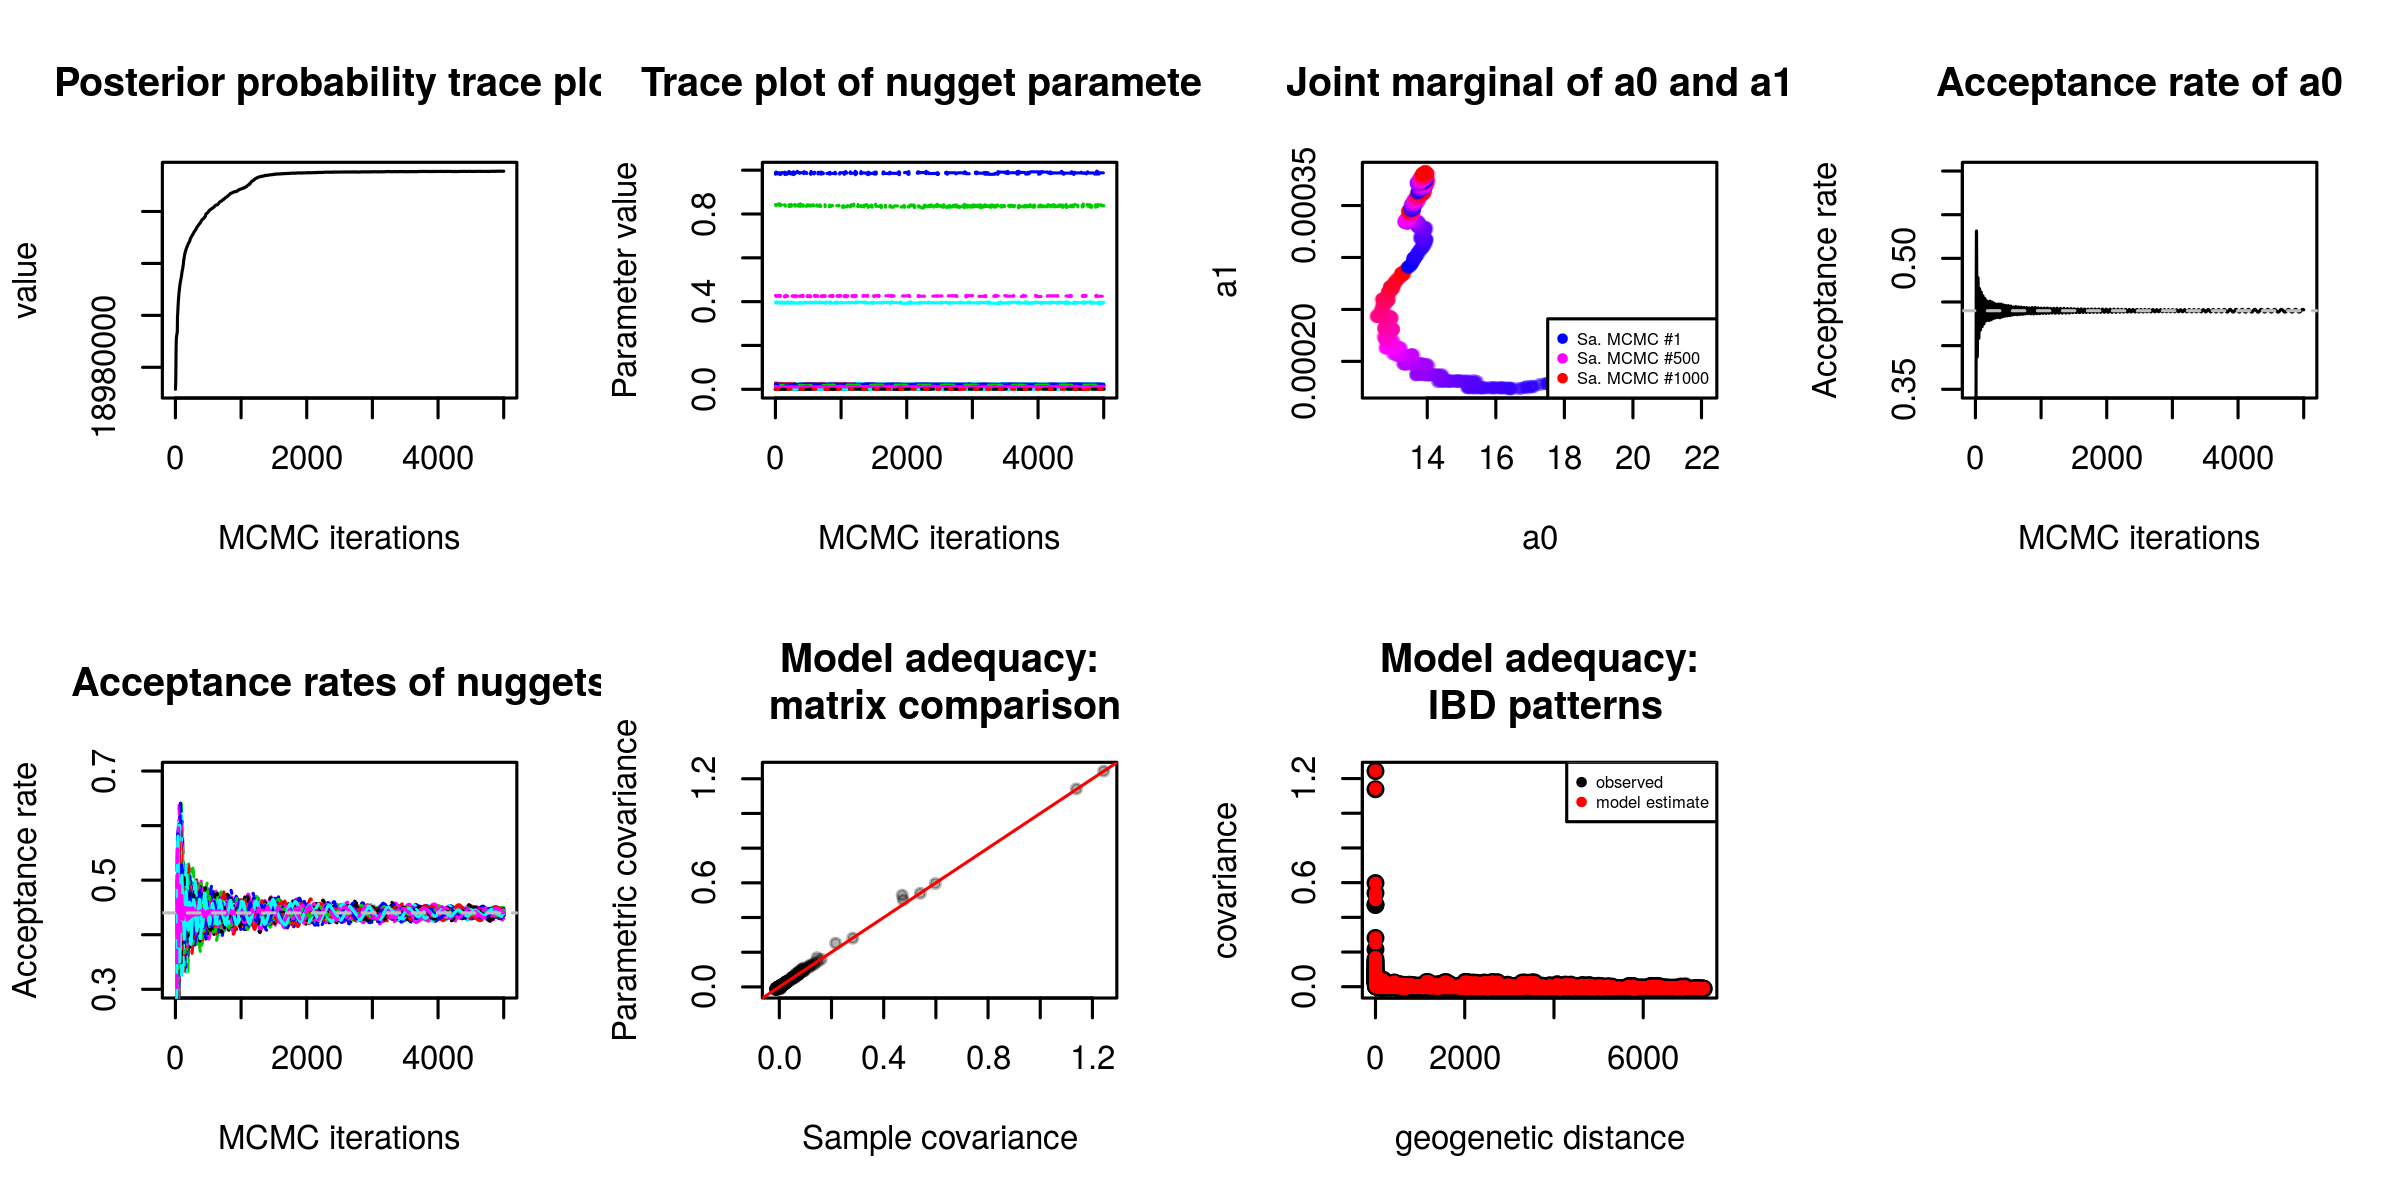

In [91]:
from IPython.display import Image

MYPD="/mnt/solexa/mel_yang/neolithic/SpaceMix/"
FH="ind_A_v13_TBH5"
SUBSET,RUNNUM=("EAS_randomdraw",0)
SUBSET="EAS_randomdraw_noGPS"; RUNNUM=814122
SUBSET="EAS_randomdraw_wGPS"; RUNNUM=318896
SUBSET="EAS_all_wGPS"; RUNNUM=677903
SUBSET="EAS_all_noGPS"; RUNNUM=15999

myinputs=[("subEA+ANC_rd_noGPS",453646),#10M MCMC gens
        ("subEA+ANC_rd_wGPS",317741),
        ("subEA+ANC_all_noGPS",581950),
        ("subEA+ANC_all_wGPS",208182),
        ("EAS+ANC_rd_noGPS",594454),
        ("EAS+ANC_rd_wGPS",120638),
        ("EAS+ANC_all_noGPS",523309),
        ("EAS+ANC_all_wGPS",755299)]
SUBSET,RUNNUM=myinputs[7]
Image(filename=MYPD+"imagefiles/"+FH+"_"+str(SUBSET)+'_MCMC.png',width=1000,height=700) 


## Geogenetic Map

In [2]:
%%writefile /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemix_geogenetic.R
args=commandArgs(TRUE)
MYPD = as.character(args[1])      ##project directory
FH = as.character(args[2])        ##fh of data
RUNNUM = as.character(args[3])    ##Run Number
SUBSET = as.character(args[4])    ##subset after fh
SUBSET2 = as.character(args[5])   ##subset without GPS part
NEWNAME = as.character(args[6])   ##new png name to add
ADMIXPOPS= as.character(args[7])  ##popns to show admixture source for, "," to separate

require(SpaceMix)
setwd(MYPD)

png(paste("imagefiles/",FH,"_",SUBSET,"_",NEWNAME,"_geogenetic.png",sep=""))

ADMIXLST = strsplit(ADMIXPOPS,",")[[1]]

if (RUNNUM != 0) {
    GPS=read.table(paste(MYPD,FH,"_",SUBSET2,".latlong",sep=""),header=FALSE)
    lat=GPS$V2
    lon=GPS$V3
    population.coordinates <- as.matrix(GPS[,2:3])

    sample.names <- as.character(GPS$V1) ##popn id

    # And generate a vector of sample colors
    sample.colors <- rainbow(n=length(GPS$V1),start=4/6,end=6/6)[as.numeric(cut(population.coordinates[,1],length(GPS$V1)))]

    # And now generate a sample map list using a 95% 
    #	credible interval on parameter estimates without 
    # 	`burning' (i.e., discarding) any sampled iterations
    #	of the MCMC.
    example.spacemix.map.list <- make.spacemix.map.list(MCMC.output.file =paste("run_",RUNNUM,"/",SUBSET,"_LongRun/",SUBSET,"_space_MCMC_output1.Robj",sep=""),
                                    geographic.locations = population.coordinates,
                                    name.vector = sample.names,
                                    color.vector = sample.colors,
                                    quantile=0.95,
                                    burnin=0)
        }
if (RUNNUM == 0) {
    data(example.spacemix.map.list)
        }

# Trace plot of posterior probability over the MCMC


# Now we generate a map of the output showing sample names 
#	at the locations of the maximum a posteriori (MAP) 
#	geogenetic location parameter estimates
#make.spacemix.map(spacemix.map.list = example.spacemix.map.list,
#				text=TRUE,
#				ellipses=FALSE,
#				source.option=FALSE)

# Now, to visualize uncertainty in location parameter estimates, 
#	we generate a map of the output showing 95% credible
#	ellipses for the geogenetic locations of all samples 
#	and plotting sample names at the locations of the 
#	maximum a posteriori (MAP) geogenetic location parameter
#	estimates
#make.spacemix.map(spacemix.map.list = example.spacemix.map.list,
#				text=TRUE,
#				ellipses=FALSE,
#				source.option=TRUE,xlim=c(0,50),ylim=c(80,125)) #xlim=c(25,40),ylim=c(105,115)) #

# To do a better job, we can be selective about which admixutre 
#	sources we highlight using the `query.spacemix.map` function
make.spacemix.map(example.spacemix.map.list,
				source.option=FALSE,ellipses=FALSE,
				text=TRUE,xlim=c(10,60),ylim=c(90,130))

# Now, we just highlight the geogenetic location for Sample 9, 
#	as well as the location of its source of admixture, which 
#	is plotted in italics with a dashed border around its 95% 
#	credible ellipse.
query.spacemix.map(focal.pops=ADMIXLST,
						spacemix.map.list = example.spacemix.map.list,
						ellipses=FALSE,source.option=TRUE)


dev.off()


Overwriting /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemix_geogenetic.R


In [81]:
%%writefile /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemix_plotgeogenetic.py
from subprocess import Popen, PIPE
MYPD="/mnt/solexa/mel_yang/neolithic/SpaceMix/"
FH="ind_A_v13_TBH5"
SUBSET1="EAS_randomdraw"
#SUBSET1="EAS_all"
SUBSET="EAS_randomdraw_noGPS"; RUNNUM=814122
SUBSET="EAS_randomdraw_wGPS"; RUNNUM=318896
SUBSET="EAS_all_wGPS"; RUNNUM=677903
#SUBSET="EAS_all_noGPS"; RUNNUM=15999

myinputs=[("subEA+ANC_rd_noGPS",453646),
        ("subEA+ANC_rd_wGPS",317741),
        ("subEA+ANC_all_noGPS",581950),
        ("subEA+ANC_all_wGPS",208182),
        ("EAS+ANC_rd_noGPS",594454),
        ("EAS+ANC_rd_wGPS",120638),
        ("EAS+ANC_all_noGPS",523309),
        ("EAS+ANC_all_wGPS",755299)]

#Rscript ${MYPD}spacemix_geogenetic.R ${MYPD} ${FH} ${RUNNUM} ${SUBSET} ${SUBSET1} "south" "Dai,Maonan,Zhuang,Gelao"
#Rscript ${MYPD}spacemix_geogenetic.R ${MYPD} ${FH} ${RUNNUM} ${SUBSET} ${SUBSET1} "northeast" "Daur,Hezhen,Oroqen,Ulchi"
pnglabel,pops=("south","Dai,Maonan,Zhuang,Gelao")
pnglabel,pops=("northeast","Daur,Hezhen,Oroqen,Ulchi")
pnglabel,pops=("ancient","Linzi,LiangDao,Boisman_MN,Zongri")

for SUBSET,RUNNUM in myinputs:
    SUBSET1='_'.join(SUBSET.split('_')[:-1])
    print SUBSET1
    #print RUNNUM,SUBSET
    mycommand = "Rscript %sspacemix_geogenetic.R %s %s %i %s %s %s %s" % (MYPD,MYPD,FH,RUNNUM,SUBSET,SUBSET1,pnglabel,pops)
    print 'Running command', mycommand

    varfile = Popen(mycommand.split(), stdout = PIPE)
    varfile.communicate()
    #break

Overwriting /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemix_plotgeogenetic.py


In [105]:
from IPython.display import Image

MYPD="/mnt/solexa/mel_yang/neolithic/SpaceMix/"
FH="ind_A_v13_TBH5"
SUBSET,RUNNUM=("EAS_randomdraw",0)
SUBSET="EAS_randomdraw_noGPS"; RUNNUM=814122
SUBSET="EAS_randomdraw_wGPS"; RUNNUM=318896
SUBSET="EAS_all_wGPS"; RUNNUM=677903
#SUBSET="EAS_all_noGPS"; RUNNUM=15999

SUBSET2="northeast"
#SUBSET2="ancient"
#SUBSET2="south"
myinputs=[("subEA+ANC_rd_noGPS",453646),
        ("subEA+ANC_rd_wGPS",317741),
        ("subEA+ANC_all_noGPS",581950),
        ("subEA+ANC_all_wGPS",208182),
        ("EAS+ANC_rd_noGPS",594454),
        ("EAS+ANC_rd_wGPS",120638),
        ("EAS+ANC_all_noGPS",523309),
        ("EAS+ANC_all_wGPS",755299)]
SUBSET,RUNNUM=myinputs[7]
Image(filename=MYPD+"imagefiles/"+FH+"_"+str(SUBSET)+"_"+str(SUBSET2)+'_geogenetic.png',width=500,height=500) 

IOError: [Errno 2] No such file or directory: u'/mnt/solexa/mel_yang/neolithic/SpaceMix/imagefiles/ind_A_v13_TBH5_EAS+ANC_rd_wGPS_ancient_geogenetic.png'